In [2]:
import sqlite3
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import math

%matplotlib inline

In [3]:
db_dir = '/var/data/AFLW/aflw/data/aflw.sqlite'

con = sqlite3.connect(db_dir)
cursor = con.cursor()

res = con.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

Faces
sqlite_sequence
FacePose
FaceImages
Databases
FaceMetaData
sqlite_stat1
FaceRect
AnnotationType
FaceEllipse
NearDuplicates
FeatureCoords
FeatureCoordTypes
CamPose


In [4]:
#faces = pd.read_sql_query("SELECT * FROM Faces", con)
#print(faces)
#images = pd.read_sql_query("SELECT file_id FROM FaceImages", con)
#images = pd.read_sql_query("SELECT file_id FROM FaceImages",con).as_matrix()
#print(images)
#ellip = pd.read_sql_query("SELECT * FROM FaceEllipse", con)
#print(ellip)

faces = pd.read_sql_query("SELECT face_id, file_id FROM Faces", con)
images = pd.read_sql_query("SELECT file_id, filepath FROM FaceImages", con)
image_list = pd.read_sql_query("SELECT file_id FROM FaceImages", con).as_matrix()
ellip = pd.read_sql_query("SELECT face_id, x, y, ra, rb, theta FROM FaceEllipse", con)
#print(faces)
#print(images)

In [5]:
#get face id from ~~~
f_id = faces.face_id[(list(faces.file_id.as_matrix()).index(image_list[4983]))]   # =>SQL명령으로 바꾸니
print(f_id)

img_path = images.filepath[(list(images.file_id.as_matrix()).index(image_list[4983]))]
print(img_path)

ellip_idx = list(ellip.face_id.as_matrix()).index(f_id)
print(ellip_idx)

58215
0/image11927.jpg
17793


In [6]:
img = cv2.imread('/var/data/AFLW/aflw/data/flickr/'+img_path)
#print(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [7]:
thickness = math.ceil(sum(img.shape[0:2])/300)
img = cv2.ellipse(img, 
                  (int(ellip['x'][ellip_idx]), int(ellip['y'][ellip_idx])), 
                   (int(ellip['rb'][ellip_idx]), int(ellip['ra'][ellip_idx])), 
                    0, 0, 360, 255, thickness)

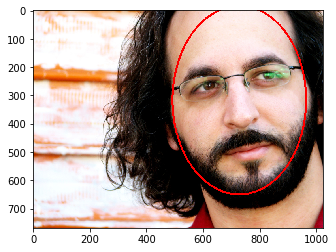

In [8]:
plt.imshow(img)

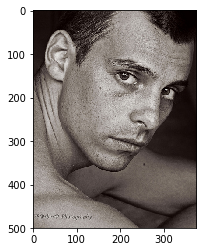

In [9]:
#?images
idx = 0

# load an image
#print(images)
img_path = images['filepath'][idx]

img = cv2.imread('/var/data/AFLW/aflw/data/flickr/'+img_path)
#print(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


# plot an ellipse






In [ ]:
def    xxxxx 함수로 만들기:
    """
    함수 설명
    input: 
    output: 
    """
    
#불러오기
